### Data Comparing Script

**Purpose:** Compare `mratio` and calculate `r` and `p` for **all** combinations of domains & find DGIs in all datasets

Author: Saurish Srivastava @ [Subjectivity Lab](https://subjectivity.sites.northeastern.edu/)

In [ ]:
# install packages
!pip3 install numpy
!pip3 install pandas
!pip3 install seaborn
!pip3 install matplotlib
!pip3 install scipy

In [1]:
# imports
import numpy as np
import pandas as pd
import scipy.stats as st
import seaborn as sns
import math
import matplotlib.pyplot as plt

from itertools import combinations

sns.set_context("talk")
sns.set_style('darkgrid')

In [2]:
# to filter out Runtime warnings from metrics (happens due to log of small numbers):
import warnings
warnings.filterwarnings("ignore", message="invalid value encountered in log")

## Add Metrics

In [3]:
def addMetrics(dataName, domains):
    """
    For string {dataName} & list {domains}: adds the log of mratios & DGIs for each combination for domains.
    Returns: a dataframe with above variables and exports to '/exports/metrics_{dataName}.csv'
    """
    # adjust domains
    temp_domains = [domain + '_mratio' for domain in domains]
    temp_domains.insert(0, 'Subject')
    
    # read in data
    originalData = pd.read_csv("../exports/analysis_" + dataName + ".csv")
    metricData = pd.read_csv("../exports/analysis_" + dataName + ".csv", usecols=temp_domains)
    
    # get data in order by subject
    metricData = metricData.sort_values(by=['Subject']).reset_index(drop=True)
    
    # add log to data
    for domain in temp_domains:
        if domain != 'Subject':
            metricData[domain + '_log'] = np.log(metricData[domain])
            metricData = metricData.drop(columns=[domain])
    
    # get DGI
    for combo in combinations(domains, 2):
        metricData['DGI_' + combo[0] + '_' + combo[1]] = abs(metricData[combo[0] + '_mratio_log'] -
                                                       metricData[combo[1] + '_mratio_log'])

    # combine both dfs into one
    fullData = originalData.merge(metricData, on='Subject', how='outer')
    
    # export full data to {export} location
    fullData.to_csv('../exports/metrics_' + dataName + '.csv')
    print(f"Exported: 'metrics_{dataName}.csv'")
    
    return fullData

In [4]:
addMetrics(dataName='Arbuzova_unpub_3', domains=['memory', 'visual', 'visuomotor', 'motor'])

Exported: 'metrics_Arbuzova_unpub_3.csv'


,Subject,memory_scores,memory_rates,memory_dprime,memory_metad,memory_criterion,memory_mratio,memory_mdiff,visual_scores,visual_rates,...,memory_mratio_log,visual_mratio_log,visuomotor_mratio_log,motor_mratio_log,DGI_memory_visual,DGI_memory_visuomotor,DGI_memory_motor,DGI_visual_visuomotor,DGI_visual_motor,DGI_visuomotor_motor
0,1,"(59, 15, 33, 79)","(0.7972972972972973, 0.29464285714285715)",1.352651,2.059890,-0.146067,1.522855,0.707240,"(66, 29, 33, 72)","(0.6947368421052632, 0.3142857142857143)",...,0.420587,0.558702,NaN,NaN,0.138115,NaN,NaN,NaN,NaN,NaN
1,2,"(55, 27, 28, 71)","(0.6707317073170732, 0.2828282828282828)",1.004308,1.430379,0.066263,1.424243,0.426071,"(71, 17, 35, 57)","(0.8068181818181818, 0.3804347826086957)",...,0.353641,-2.109153,-0.170153,-0.799652,2.462794,0.523794,1.153293,1.939000,1.309501,0.629499
2,3,"(66, 23, 12, 80)","(0.7415730337078652, 0.13043478260869565)",1.745714,2.114382,0.238068,1.211185,0.368668,"(70, 20, 32, 58)","(0.7777777777777778, 0.35555555555555557)",...,0.191599,-0.037322,-0.082214,-0.854450,0.228921,0.273813,1.046049,0.044893,0.817129,0.772236
3,4,"(81, 17, 16, 75)","(0.826530612244898, 0.17582417582417584)",1.845607,1.713278,-0.004573,0.928300,-0.132330,"(62, 34, 15, 69)","(0.6458333333333334, 0.17857142857142858)",...,-0.074400,-0.245858,0.332933,-0.241253,0.171458,0.407333,0.166853,0.578791,0.004604,0.574187
4,5,"(67, 34, 23, 67)","(0.6633663366336634, 0.25555555555555554)",1.066060,1.315906,0.117720,1.234365,0.249847,NaN,NaN,...,0.210556,NaN,-0.663155,-0.306595,NaN,0.873711,0.517151,NaN,NaN,0.356560
5,6,"(46, 35, 19, 82)","(0.5679012345679012, 0.18811881188118812)",1.042497,1.561200,0.356908,1.497559,0.518704,"(69, 18, 35, 58)","(0.7931034482758621, 0.3763440860215054)",...,0.403837,0.099276,0.179494,-0.297281,0.304561,0.224342,0.701118,0.080218,0.396557,0.476775
6,7,"(62, 29, 31, 64)","(0.6813186813186813, 0.3263157894736842)",0.910972,1.544639,-0.010640,1.695594,0.633667,"(61, 28, 22, 69)","(0.6853932584269663, 0.24175824175824176)",...,0.528033,-0.013645,-0.908425,-0.861526,0.541678,1.436458,1.389559,0.894780,0.847881,0.046899
7,8,"(74, 17, 24, 77)","(0.8131868131868132, 0.2376237623762376)",1.582767,1.831049,-0.087867,1.156865,0.248281,"(69, 34, 17, 60)","(0.6699029126213593, 0.22077922077922077)",...,0.145714,0.222300,NaN,-0.531473,0.076586,NaN,0.677187,NaN,0.753773,NaN
8,9,"(74, 23, 19, 73)","(0.7628865979381443, 0.20652173913043478)",1.514500,1.841458,0.051465,1.215885,0.326957,"(67, 11, 41, 61)","(0.8589743589743589, 0.4019607843137255)",...,0.195472,-0.298146,-0.506594,-0.743545,0.493617,0.702066,0.939016,0.208449,0.445399,0.236950
9,10,"(64, 35, 18, 64)","(0.6464646464646465, 0.21951219512195122)",1.134320,1.276725,0.199024,1.125542,0.142405,"(66, 14, 40, 60)","(0.825, 0.4)",...,0.118265,-0.106163,-0.703954,NaN,0.224428,0.822219,NaN,0.597791,NaN,NaN


In [5]:
addMetrics(dataName='Mazancieux_2018', domains=['VP', 'EF', 'SM', 'EM'])

Exported: 'metrics_Mazancieux_2018.csv'


,Subject,VP_scores,VP_rates,VP_dprime,VP_metad,VP_criterion,VP_mratio,VP_mdiff,SM_scores,SM_rates,...,VP_mratio_log,EF_mratio_log,SM_mratio_log,EM_mratio_log,DGI_VP_EF,DGI_VP_SM,DGI_VP_EM,DGI_EF_SM,DGI_EF_EM,DGI_SM_EM
0,1,"(17, 5, 5, 13)","(0.7727272727272727, 0.2777777777777778)",1.264025,0.646595,-0.079201,0.511537,-0.617430,"(14, 6, 5, 15)","(0.7, 0.25)",...,-0.670336,0.123766,0.534370,0.608803,0.794102,1.204707,1.279139,0.410605,0.485038,0.074433
1,2,"(16, 3, 11, 10)","(0.8421052631578947, 0.5238095238095238)",0.877590,0.382232,-0.531433,0.435548,-0.495358,"(21, 0, 2, 17)","(0.9761904761904762, 0.10526315789473684)",...,-0.831151,-0.517330,-2.168646,-0.407627,0.313821,1.337495,0.423524,1.651316,0.109703,1.761018
2,3,"(17, 4, 4, 15)","(0.8095238095238095, 0.21052631578947367)",1.580910,0.840950,-0.035773,0.531941,-0.739959,"(16, 5, 9, 10)","(0.7619047619047619, 0.47368421052631576)",...,-0.631223,0.259582,0.578821,0.865247,0.890805,1.210044,1.496470,0.319238,0.605664,0.286426
3,4,"(16, 4, 5, 15)","(0.8, 0.25)",1.429123,1.077677,-0.083566,0.754083,-0.351446,"(11, 8, 9, 12)","(0.5789473684210527, 0.42857142857142855)",...,-0.282253,0.021004,1.326675,0.531824,0.303257,1.608928,0.814077,1.305672,0.510820,0.794852
4,5,"(18, 6, 3, 13)","(0.75, 0.1875)",1.464137,1.265364,0.106328,0.864239,-0.198773,"(17, 6, 3, 14)","(0.7391304347826086, 0.17647058823529413)",...,-0.145906,-0.132571,-0.076946,0.170225,0.013335,0.068961,0.316131,0.055625,0.302796,0.247171
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176,35,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"(14, 3, 7, 16)","(0.8235294117647058, 0.30434782608695654)",...,NaN,-1.069402,-0.178345,0.108045,NaN,NaN,NaN,0.891056,1.177447,0.286391
177,78,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"(16, 5, 7, 12)","(0.7619047619047619, 0.3684210526315789)",...,NaN,0.114096,0.181393,-0.286373,NaN,NaN,NaN,0.067297,0.400468,0.467765
178,116,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"(14, 7, 4, 15)","(0.6666666666666666, 0.21052631578947367)",...,NaN,-0.624745,0.770449,1.015289,NaN,NaN,NaN,1.395194,1.640034,0.244840
179,139,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"(21, 2, 4, 13)","(0.9130434782608695, 0.23529411764705882)",...,NaN,-0.207858,-0.894398,-0.027484,NaN,NaN,NaN,0.686540,0.180373,0.866914


In [6]:
addMetrics(dataName='Sadeghi_2017', domains=['memory', 'perception'])

Exported: 'metrics_Sadeghi_2017.csv'


,Subject,memory_scores,memory_rates,memory_dprime,memory_metad,memory_criterion,memory_mratio,memory_mdiff,perception_scores,perception_rates,perception_dprime,perception_metad,perception_criterion,perception_mratio,perception_mdiff,memory_mratio_log,perception_mratio_log,DGI_memory_perception
0,503,"(46, 54, 14, 86)","(0.46, 0.14)",0.965006,1.218505,0.590377,1.262692,0.253500,"(66, 24, 27, 63)","(0.7333333333333333, 0.3)",1.133231,1.803651,-4.926261e-02,1.591600,0.670420,0.233246,0.464740,0.231494
1,504,"(70, 30, 19, 81)","(0.7, 0.19)",1.385355,2.213079,0.176748,1.597481,0.827724,"(69, 21, 33, 57)","(0.7666666666666667, 0.36666666666666664)",1.055178,0.882445,-1.936092e-01,0.836299,-0.172733,0.468428,-0.178769,0.647197
2,507,"(74, 26, 43, 57)","(0.74, 0.43)",0.810647,0.845147,-0.233486,1.042559,0.034501,"(48, 42, 13, 77)","(0.5333333333333333, 0.14444444444444443)",1.126260,0.951894,4.884553e-01,0.845182,-0.174365,0.041679,-0.168203,0.209882
3,508,"(44, 56, 21, 79)","(0.44, 0.21)",0.647035,0.907154,0.478695,1.402018,0.260120,"(43, 47, 5, 85)","(0.4777777777777778, 0.05555555555555555)",1.495976,1.491450,8.244753e-01,0.996975,-0.004525,0.337913,-0.003030,0.340942
4,509,"(92, 8, 37, 63)","(0.92, 0.37)",1.706079,0.865935,-0.536609,0.507559,-0.840144,"(68, 22, 29, 61)","(0.7555555555555555, 0.32222222222222224)",1.139214,-0.216956,-1.152917e-01,-0.190444,-1.356170,-0.678143,NaN,NaN
5,510,"(65, 35, 19, 81)","(0.65, 0.19)",1.247955,0.976878,0.246288,0.782783,-0.271077,"(56, 34, 15, 75)","(0.6222222222222222, 0.16666666666666666)",1.260654,1.130621,3.280496e-01,0.896853,-0.130033,-0.244900,-0.108864,0.136036
6,511,"(84, 16, 33, 67)","(0.84, 0.33)",1.415986,0.897530,-0.277272,0.633855,-0.518457,"(45, 45, 6, 84)","(0.5, 0.06666666666666667)",1.465234,1.244601,7.505430e-01,0.849421,-0.220633,-0.455936,-0.163200,0.292736
7,512,"(81, 19, 31, 69)","(0.81, 0.31)",1.357166,0.930412,-0.191023,0.685555,-0.426754,"(56, 34, 22, 68)","(0.6222222222222222, 0.24444444444444444)",0.990951,1.486204,1.903774e-01,1.499775,0.495253,-0.377527,0.405315,0.782842
8,516,"(87, 13, 23, 77)","(0.87, 0.23)",1.839311,1.311975,-0.193772,0.713297,-0.527337,"(51, 39, 12, 78)","(0.5666666666666667, 0.13333333333333333)",1.258277,1.227723,4.714388e-01,0.975717,-0.030554,-0.337858,-0.024582,0.313276
9,517,"(59, 41, 20, 80)","(0.59, 0.2)",1.056312,0.479784,0.307038,0.454206,-0.576528,"(58, 32, 18, 72)","(0.6444444444444445, 0.2)",1.196010,1.640551,2.356285e-01,1.371687,0.444541,-0.789204,0.316041,1.105245


In [7]:
addMetrics(dataName='Samaha_2016', domains=['percept_low', 'percept_high', 'wm_low', 'wm_high'])

Exported: 'metrics_Samaha_2016.csv'


,Subject,percept_low_scores,percept_low_rates,percept_low_dprime,percept_low_metad,percept_low_criterion,percept_low_mratio,percept_low_mdiff,percept_high_scores,percept_high_rates,...,percept_low_mratio_log,percept_high_mratio_log,wm_low_mratio_log,wm_high_mratio_log,DGI_percept_low_percept_high,DGI_percept_low_wm_low,DGI_percept_low_wm_high,DGI_percept_high_wm_low,DGI_percept_high_wm_high,DGI_wm_low_wm_high
0,1,"(60, 17, 30, 56)","(0.7792207792207793, 0.3488372093023256)",1.161780,0.950693,-0.190551,0.818307,-0.211087,"(49, 31, 24, 53)","(0.6125, 0.3116883116883117)",...,-0.200517,0.325103,-1.166104,-2.464364,0.525621,0.965586,2.263846,1.491207,2.789467,1.298260
1,2,"(35, 47, 20, 56)","(0.4268292682926829, 0.2631578947368421)",0.442039,-0.045524,0.409046,-0.102988,-0.487563,NaN,NaN,...,NaN,NaN,-0.191837,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,"(38, 32, 21, 60)","(0.5428571428571428, 0.25925925925925924)",0.742705,1.270229,0.268998,1.710273,0.527524,"(49, 34, 20, 66)","(0.5903614457831325, 0.23255813953488372)",...,0.536653,0.102335,-0.364856,-0.703207,0.434318,0.901510,1.239860,0.467192,0.805543,0.338351
3,4,"(72, 12, 7, 71)","(0.8571428571428571, 0.08974358974358974)",2.432126,1.281675,0.137383,0.526977,-1.150450,"(69, 10, 10, 69)","(0.8734177215189873, 0.12658227848101267)",...,-0.640598,-0.245191,-0.978067,NaN,0.395407,0.337470,NaN,0.732877,NaN,NaN
4,5,"(47, 29, 26, 63)","(0.618421052631579, 0.29213483146067415)",0.860894,0.606719,0.122911,0.704755,-0.254175,"(54, 30, 20, 51)","(0.6428571428571429, 0.28169014084507044)",...,-0.349906,-0.249188,-2.313599,NaN,0.100718,1.963693,NaN,2.064411,NaN,NaN
5,6,"(63, 13, 21, 53)","(0.8289473684210527, 0.28378378378378377)",1.487578,0.984685,-0.189188,0.661938,-0.502893,"(76, 13, 17, 64)","(0.8539325842696629, 0.20987654320987653)",...,-0.412583,-0.175705,0.068703,-0.587828,0.236877,0.481285,0.175246,0.244408,0.412123,0.656531
6,7,"(66, 22, 33, 50)","(0.75, 0.39759036144578314)",0.922106,0.681782,-0.207450,0.739375,-0.240324,"(59, 18, 15, 57)","(0.7662337662337663, 0.20833333333333334)",...,-0.301950,-0.465684,-0.428011,NaN,0.163734,0.126061,NaN,0.037674,NaN,NaN
7,8,"(63, 25, 22, 52)","(0.7159090909090909, 0.2972972972972973)",1.105855,0.777096,-0.019271,0.702710,-0.328759,"(47, 24, 29, 58)","(0.6619718309859155, 0.3333333333333333)",...,-0.352810,-0.834327,0.236233,NaN,0.481516,0.589043,NaN,1.070559,NaN,NaN
8,9,"(65, 15, 14, 70)","(0.8125, 0.16666666666666666)",1.824746,1.097801,0.040138,0.601619,-0.726945,"(53, 27, 15, 61)","(0.6625, 0.19736842105263158)",...,-0.508131,-0.159509,-0.058956,-0.739360,0.348623,0.449176,0.231228,0.100553,0.579851,0.680404
9,10,"(61, 25, 28, 41)","(0.7093023255813954, 0.4057971014492754)",0.769361,1.019710,-0.156489,1.325399,0.250350,"(68, 14, 20, 63)","(0.8292682926829268, 0.24096385542168675)",...,0.281714,-0.026833,0.155421,0.083650,0.308547,0.126293,0.198064,0.182254,0.110483,0.071771


In [8]:
addMetrics(dataName='Samaha_2017_exp3', domains=['oriperc', 'contrast', 'oriwm'])

Exported: 'metrics_Samaha_2017_exp3.csv'


,Subject,oriperc_scores,oriperc_rates,oriperc_dprime,oriperc_metad,oriperc_criterion,oriperc_mratio,oriperc_mdiff,contrast_scores,contrast_rates,...,oriwm_metad,oriwm_criterion,oriwm_mratio,oriwm_mdiff,oriperc_mratio_log,contrast_mratio_log,oriwm_mratio_log,DGI_oriperc_contrast,DGI_oriperc_oriwm,DGI_contrast_oriwm
0,1,"(122, 37, 29, 112)","(0.7672955974842768, 0.20567375886524822)",1.538780,0.511248,0.045778,0.332242,-1.027532,"(122, 27, 33, 118)","(0.8187919463087249, 0.2185430463576159)",...,-0.011872,-0.215364,-0.027758,-0.439566,-1.101891,-0.577216,NaN,0.524675,NaN,NaN
1,2,"(120, 24, 39, 117)","(0.8333333333333334, 0.25)",1.627749,0.509163,-0.146466,0.312802,-1.118585,"(116, 29, 34, 121)","(0.8, 0.21935483870967742)",...,0.497985,-0.360317,0.712834,-0.200614,-1.162184,-0.380369,-0.338507,0.781815,0.823677,0.041861
2,3,"(113, 39, 16, 132)","(0.743421052631579, 0.10810810810810811)",1.871609,0.878189,0.291362,0.469216,-0.993420,"(119, 19, 43, 119)","(0.8623188405797102, 0.2654320987654321)",...,0.971980,-0.111254,0.533271,-0.850697,-0.756692,-0.156586,-0.628726,0.600106,0.127966,0.472140
3,4,"(105, 45, 34, 116)","(0.7, 0.22666666666666666)",1.264467,0.272997,0.112734,0.215899,-0.991470,"(46, 4, 9, 41)","(0.92, 0.18)",...,-0.110940,-0.272543,-0.126789,-0.985942,-1.532946,NaN,NaN,NaN,NaN,NaN
4,5,"(137, 18, 44, 101)","(0.8838709677419355, 0.30344827586206896)",1.692726,-0.741136,-0.340027,-0.437836,-2.433862,"(97, 60, 7, 136)","(0.6178343949044586, 0.04895104895104895)",...,0.265086,-0.369261,0.196846,-1.081580,NaN,-1.713885,-1.625334,NaN,NaN,0.088551
5,6,"(136, 16, 21, 127)","(0.8947368421052632, 0.14189189189189189)",2.299299,1.753698,-0.090131,0.762710,-0.545600,"(102, 30, 27, 141)","(0.7727272727272727, 0.16071428571428573)",...,1.142931,-0.103518,0.660300,-0.587997,-0.270877,-0.805361,-0.415062,0.534484,0.144184,0.390299
6,7,"(112, 41, 4, 143)","(0.7320261437908496, 0.027210884353741496)",2.489253,1.981487,0.652256,0.796016,-0.507767,"(124, 24, 36, 116)","(0.8378378378378378, 0.23684210526315788)",...,1.854988,-0.132930,0.901459,-0.202773,-0.228135,-0.281039,-0.103740,0.052903,0.124395,0.177298
7,8,"(108, 28, 27, 137)","(0.7941176470588235, 0.16463414634146342)",1.780700,1.749291,0.077398,0.982362,-0.031409,"(83, 49, 14, 154)","(0.6287878787878788, 0.08333333333333333)",...,1.726193,-0.191486,0.908593,-0.173660,-0.017796,-0.564485,-0.095858,0.546689,0.078063,0.468626
8,9,"(125, 35, 36, 104)","(0.78125, 0.2571428571428571)",1.417364,1.455795,-0.062121,1.027115,0.038432,"(138, 21, 40, 101)","(0.8679245283018868, 0.28368794326241137)",...,0.344984,-0.822321,0.205191,-1.336295,0.026754,-1.772645,-1.583812,1.799399,1.610565,0.188834
9,10,"(121, 37, 22, 120)","(0.7658227848101266, 0.15492957746478872)",1.725158,0.279488,0.145179,0.162007,-1.445670,"(117, 41, 21, 121)","(0.740506329113924, 0.14788732394366197)",...,0.216487,-0.360877,0.139122,-1.339605,-1.820115,-1.082588,-1.972402,0.737527,0.152287,0.889814


In [9]:
addMetrics(dataName='Schmidt_2019', domains=['memory', 'perception'])

Exported: 'metrics_Schmidt_2019.csv'


,Subject,memory_scores,memory_rates,memory_dprime,memory_metad,memory_criterion,memory_mratio,memory_mdiff,perception_scores,perception_rates,perception_dprime,perception_metad,perception_criterion,perception_mratio,perception_mdiff,memory_mratio_log,perception_mratio_log,DGI_memory_perception
0,1,"(74, 20, 19, 87)","(0.7872340425531915, 0.1792452830188679)",-0.890507,-0.098523,0.060692,0.110637,0.791984,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-2.201502,NaN,NaN
1,15,"(85, 18, 11, 86)","(0.8252427184466019, 0.1134020618556701)",1.098836,1.362886,0.136551,1.240299,0.264050,"(135, 15, 63, 87)","(0.9, 0.42)",0.692708,1.807747,-0.539829,2.609681,1.115039,0.215353,0.959228,0.743875
2,22,"(71, 40, 25, 64)","(0.6396396396396397, 0.2808988764044944)",1.824839,-0.016143,0.111339,-0.008846,-1.840982,"(144, 9, 73, 74)","(0.9411764705882353, 0.4965986394557823)",-0.967422,-0.479273,-0.778100,0.495413,0.488148,NaN,-0.702363,NaN
3,29,"(58, 42, 10, 90)","(0.58, 0.1)",1.348980,1.004837,0.539829,0.744887,-0.344143,"(127, 14, 72, 87)","(0.900709219858156, 0.4528301886792453)",1.432566,0.597112,-0.583545,0.416813,-0.835453,-0.294523,-0.875117,0.580594
4,30,"(96, 22, 9, 73)","(0.8135593220338984, 0.10975609756097561)",0.821131,-0.487097,0.168369,-0.593203,-1.308228,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,42,"(74, 25, 13, 88)","(0.7474747474747475, 0.12871287128712872)",1.119273,1.047802,0.232966,0.936146,-0.071470,"(104, 37, 51, 108)","(0.7375886524822695, 0.32075471698113206)",0.157311,2.927683,-0.085170,18.610832,2.770372,-0.065984,2.923744,2.989728
6,43,"(90, 18, 14, 78)","(0.8333333333333334, 0.15217391304347827)",0.541202,0.469818,0.029866,0.868101,-0.071384,"(138, 7, 76, 79)","(0.9517241379310345, 0.49032258064516127)",2.097346,-0.391501,-0.818773,-0.186665,-2.488847,-0.141447,NaN,NaN
7,55,"(79, 26, 16, 79)","(0.7523809523809524, 0.16842105263157894)",1.468989,1.428493,0.139211,0.972433,-0.040496,"(107, 44, 43, 106)","(0.7086092715231788, 0.28859060402684567)",0.210428,0.399670,0.004090,1.899318,0.189242,-0.027954,0.641495,0.669449
8,56,"(64, 25, 14, 97)","(0.7191011235955056, 0.12612612612612611)",0.967422,-1.133427,0.282361,-1.171595,-2.100848,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,81,"(72, 30, 20, 78)","(0.7058823529411765, 0.20408163265306123)",0.534723,-0.274742,0.142868,-0.513803,-0.809465,"(138, 11, 80, 71)","(0.9261744966442953, 0.5298013245033113)",-0.282216,-0.124789,-0.761325,0.442176,0.157427,NaN,-0.816048,NaN


In [10]:
addMetrics(dataName='Skora_2016', domains=['FM', 'IM', 'WM'])

Exported: 'metrics_Skora_2016.csv'


,Subject,FM_scores,FM_rates,FM_dprime,FM_metad,FM_criterion,FM_mratio,FM_mdiff,IM_scores,IM_rates,...,WM_metad,WM_criterion,WM_mratio,WM_mdiff,FM_mratio_log,IM_mratio_log,WM_mratio_log,DGI_FM_IM,DGI_FM_WM,DGI_IM_WM
0,1,"(46, 14, 12, 48)","(0.7666666666666667, 0.2)",1.537887,1.993427,5.685397e-02,1.296212,0.455540,"(55, 5, 4, 56)","(0.9166666666666666, 0.06666666666666667)",...,0.400983,0.409542,0.415259,-0.564640,0.259446,0.066413,-0.878854,0.193033,1.138300,0.945267
1,3,"(46, 14, 24, 36)","(0.7666666666666667, 0.4)",0.988682,1.884945,-2.372831e-01,1.906522,0.896262,"(46, 14, 6, 54)","(0.7666666666666667, 0.1)",...,0.214121,0.349924,0.237274,-0.688301,0.645281,-0.466620,-1.438540,1.111900,2.083821,0.971921
2,4,"(49, 11, 13, 47)","(0.8166666666666667, 0.21666666666666667)",1.759226,1.837252,-5.961721e-02,1.044353,0.078026,"(49, 11, 11, 49)","(0.8166666666666667, 0.18333333333333332)",...,NaN,NaN,NaN,NaN,0.043397,-0.327109,NaN,0.370506,NaN,NaN
3,5,"(52, 8, 12, 48)","(0.8666666666666667, 0.2)",1.955041,2.373046,-1.345752e-01,1.213809,0.418005,"(56, 4, 2, 58)","(0.9333333333333333, 0.03333333333333333)",...,0.979105,0.134575,0.513305,-0.928347,0.193763,NaN,-0.666885,NaN,0.860648,NaN
4,6,"(54, 6, 26, 34)","(0.9, 0.43333333333333335)",1.475422,1.407896,-5.568288e-01,0.954233,-0.067525,"(58, 2, 17, 43)","(0.9666666666666667, 0.2833333333333333)",...,1.404079,0.237283,1.458313,0.441269,-0.046847,-0.269482,0.377280,0.222635,0.424127,0.646762
5,7,"(51, 9, 13, 47)","(0.85, 0.21666666666666667)",1.813549,1.984212,-1.264665e-01,1.094105,0.170663,"(54, 6, 3, 57)","(0.9, 0.05)",...,1.246496,0.724723,1.154238,0.166566,0.089936,-0.037643,0.143440,0.127580,0.053504,0.181084
6,8,"(4, 56, 59, 1)","(0.06666666666666667, 0.9833333333333333)",-3.535945,-4.388311,-3.134796e-01,1.241058,-0.852367,"(3, 57, 60, 0)","(0.05, 0.9916666666666667)",...,-2.567027,-0.000000,0.926693,0.203066,0.215964,-0.168515,-0.076132,0.384479,0.292097,0.092383
7,9,"(48, 12, 12, 48)","(0.8, 0.2)",1.624151,0.351250,-5.551115e-17,0.216267,-1.272901,"(53, 7, 23, 37)","(0.8833333333333333, 0.38333333333333336)",...,1.262960,0.096099,1.279136,0.275606,-1.531241,0.192098,0.246185,1.723339,1.777426,0.054087
8,10,"(51, 9, 23, 37)","(0.85, 0.38333333333333336)",1.358835,1.840500,-3.698478e-01,1.354469,0.481665,"(40, 20, 9, 51)","(0.6666666666666666, 0.15)",...,1.212615,0.189167,0.867182,-0.185725,0.303410,0.229496,-0.142507,0.073914,0.445916,0.372002
9,11,"(39, 21, 8, 52)","(0.65, 0.13333333333333333)",1.503035,1.218943,3.627256e-01,0.810988,-0.284092,"(46, 14, 7, 53)","(0.7666666666666667, 0.11666666666666667)",...,0.630100,0.616803,0.574042,-0.467554,-0.209503,0.389657,-0.555052,0.599159,0.345549,0.944708


In [11]:
addMetrics(dataName='Ye_2018', domains=['perception', 'memory'])

Exported: 'metrics_Ye_2018.csv'


,Subject,perception_scores,perception_rates,perception_dprime,perception_metad,perception_criterion,perception_mratio,perception_mdiff,memory_scores,memory_rates,memory_dprime,memory_metad,memory_criterion,memory_mratio,memory_mdiff,perception_mratio_log,memory_mratio_log,DGI_perception_memory
0,1,"(178, 31, 59, 187)","(0.8516746411483254, 0.23983739837398374)",1.739874,2.472283,-0.168409,1.420955,0.732409,"(146, 84, 40, 186)","(0.6347826086956522, 0.17699115044247787)",1.290457,1.806628,0.291173,1.399991,0.516171,0.351329,0.336466,0.014863
1,2,"(183, 57, 66, 174)","(0.7625, 0.275)",1.305812,1.846765,-0.058304,1.414265,0.540952,"(149, 84, 93, 141)","(0.6394849785407726, 0.3974358974358974)",0.601381,0.975015,-0.048546,1.621295,0.373635,0.346610,0.483225,0.136615
2,3,"(179, 46, 56, 193)","(0.7955555555555556, 0.2248995983935743)",1.573334,2.153811,-0.035050,1.368947,0.580477,"(157, 75, 82, 155)","(0.6767241379310345, 0.3459915611814346)",0.850858,1.845430,-0.031196,2.168904,0.994572,0.314042,0.774222,0.460180
3,4,"(179, 63, 48, 188)","(0.7396694214876033, 0.2033898305084746)",1.464447,2.067944,0.093624,1.412099,0.603497,"(155, 81, 60, 178)","(0.6567796610169492, 0.25210084033613445)",1.087300,1.881378,0.132102,1.730322,0.794078,0.345077,0.548307,0.203230
4,5,"(181, 59, 50, 184)","(0.7541666666666667, 0.21367521367521367)",1.473871,2.055156,0.053037,1.394393,0.581285,"(161, 78, 75, 163)","(0.6736401673640168, 0.31512605042016806)",0.924011,1.918497,0.015692,2.076271,0.994486,0.332459,0.730573,0.398114
5,6,"(178, 64, 59, 179)","(0.7355371900826446, 0.24789915966386555)",1.304472,1.949050,0.025734,1.494129,0.644577,"(180, 58, 102, 138)","(0.7563025210084033, 0.425)",0.885479,1.530141,-0.252670,1.728038,0.644662,0.401543,0.546987,0.145444
6,7,"(187, 50, 48, 194)","(0.7890295358649789, 0.19834710743801653)",1.641955,2.643567,0.022241,1.610012,1.001612,"(149, 88, 39, 197)","(0.6286919831223629, 0.1652542372881356)",1.315630,1.803374,0.322350,1.370731,0.487745,0.476241,0.315344,0.160897
7,8,"(193, 42, 54, 191)","(0.8212765957446808, 0.22040816326530613)",1.682029,2.072194,-0.074713,1.231961,0.390165,"(174, 61, 65, 169)","(0.7404255319148936, 0.2777777777777778)",1.228156,1.853939,-0.027601,1.509531,0.625784,0.208607,0.411799,0.203192
8,9,"(182, 47, 60, 190)","(0.7947598253275109, 0.24)",1.521524,1.838358,-0.058373,1.208235,0.316835,"(182, 51, 56, 175)","(0.7811158798283262, 0.24242424242424243)",1.466883,1.768452,-0.038721,1.205585,0.301569,0.189161,0.186965,0.002196
9,10,"(152, 66, 90, 171)","(0.6972477064220184, 0.3448275862068966)",0.911639,1.198731,-0.058589,1.314919,0.287092,"(103, 112, 76, 128)","(0.4790697674418605, 0.37254901960784315)",0.291703,1.181916,0.188799,4.051783,0.890213,0.273775,1.399157,1.125382


In [12]:
addMetrics(dataName='Xu_2019_Exp2', domains=['N_low', 'N_high', 'C_low', 'C_high'])

Exported: 'metrics_Xu_2019_Exp2.csv'


,Subject,N_low_scores,N_low_rates,N_low_dprime,N_low_metad,N_low_criterion,N_low_mratio,N_low_mdiff,C_high_scores,C_high_rates,...,N_low_mratio_log,N_high_mratio_log,C_low_mratio_log,C_high_mratio_log,DGI_N_low_N_high,DGI_N_low_C_low,DGI_N_low_C_high,DGI_N_high_C_low,DGI_N_high_C_high,DGI_C_low_C_high
0,1,"(14, 9, 7, 14)","(0.6086956521739131, 0.3333333333333333)",0.674130,1.827049,0.077403,2.710231,1.152918,"(18, 3, 3, 21)","(0.8571428571428571, 0.125)",...,0.997034,-0.043354,0.765698,0.074246,1.040388,0.231335,0.922788,0.809053,0.117600,0.691453
1,2,"(16, 7, 10, 11)","(0.6956521739130435, 0.47619047619047616)",0.545776,1.651564,-0.226110,3.026084,1.105788,"(13, 0, 1, 7)","(0.9615384615384616, 0.125)",...,1.107269,0.424739,0.742186,-0.854895,0.682530,0.365084,1.962164,0.317447,1.279634,1.597081
2,3,"(9, 12, 14, 7)","(0.42857142857142855, 0.6666666666666666)",-0.581730,-0.381320,-0.125357,0.655492,0.200411,"(17, 5, 2, 20)","(0.7727272727272727, 0.09090909090909091)",...,-0.422369,0.213445,0.306954,-2.082345,0.635814,0.729323,1.659977,0.093509,2.295791,2.389300
3,5,"(8, 15, 11, 9)","(0.34782608695652173, 0.55)",-0.493744,0.525298,0.132767,-1.063910,1.019042,"(19, 5, 3, 17)","(0.7916666666666666, 0.15)",...,NaN,-0.115822,-0.202112,0.733569,NaN,NaN,NaN,0.086291,0.849391,0.935681
4,8,"(15, 10, 6, 11)","(0.6, 0.35294117647058826)",0.598895,1.291699,0.062022,2.156805,0.692804,NaN,NaN,...,0.768628,-0.965303,NaN,NaN,1.733931,NaN,NaN,NaN,NaN,NaN
5,9,"(21, 4, 7, 13)","(0.84, 0.35)",1.308182,1.996699,-0.304569,1.526316,0.688517,"(17, 1, 7, 20)","(0.9444444444444444, 0.25925925925925924)",...,0.422857,-0.393009,1.317001,-0.626809,0.815866,0.894144,1.049666,1.710010,0.233800,1.943810
6,10,"(10, 14, 9, 10)","(0.4166666666666667, 0.47368421052631576)",-0.139187,1.225689,0.138220,-8.806079,1.364876,"(18, 4, 3, 17)","(0.8181818181818182, 0.15)",...,NaN,-0.393351,-0.104577,-0.061567,NaN,NaN,NaN,0.288774,0.331784,0.043010
7,11,"(9, 16, 12, 5)","(0.36, 0.7058823529411765)",-0.852591,1.314409,-0.091468,-1.541666,2.167000,"(19, 6, 4, 15)","(0.76, 0.21052631578947367)",...,NaN,-0.652402,0.177565,0.435532,NaN,NaN,NaN,0.829968,1.087934,0.257967
8,12,"(11, 8, 8, 13)","(0.5789473684210527, 0.38095238095238093)",0.477928,0.026852,0.051890,0.056185,-0.451075,"(18, 4, 5, 15)","(0.8181818181818182, 0.25)",...,-2.879108,0.069951,1.494199,0.219614,2.949059,4.373307,3.098722,1.424248,0.149663,1.274585
9,13,"(12, 11, 6, 15)","(0.5217391304347826, 0.2857142857142857)",0.589764,-0.082323,0.255715,-0.139587,-0.672088,"(15, 7, 5, 15)","(0.6818181818181818, 0.25)",...,NaN,0.723099,0.252380,-0.258831,NaN,NaN,NaN,0.470718,0.981930,0.511212


## Make Comparisons

In [13]:
def getComparisons(dataName, domains):
    """
    For string {dataName} and list {domains}: finds pearson r and p & creates comparison plots for mratio
    """
    
    # adjust the domains input
    
    domains = [domain + '_mratio_log' for domain in domains]
    domains.insert(0, 'Subject')
    
    # read in data
    data = pd.read_csv("../exports/" + dataName, usecols=domains)
    
    # get data in order by subject
    data = data.sort_values(by=['Subject']).reset_index(drop=True)

    # convert subjects to the index
    data = data.set_index(['Subject'])
    
    # in the event that there are infinite values, replace with NaNs
    data.replace([np.inf, -np.inf], np.nan, inplace=True)
    data = data.reset_index(drop=True)
    
    # drop rows w/ NaNs if there are not at least 2 domains
    data = data.dropna(subset=list(data.columns), thresh=abs(1-data.shape[1]))
    
    for combo in combinations(list(data.columns), 2):
        plt.figure(figsize=(8,8))
        g = sns.regplot(data=data, x=combo[0], y=combo[1], scatter_kws={'clip_on': False})
        sns.despine(offset=10, trim=True)
        g.set(ylim=(-0.75, 2))
        g.set(xlim=(None, 2.3))
        plt.title(dataName[8:-4] + ': ' + combo[1] + ' vs. ' + combo[0])
        
        x = data[combo[0]]
        y = data[combo[1]]
        nas = np.logical_or(np.isnan(x), np.isnan(y))
        
        print(combo[0] + " & " + combo[1] + " (r, p): " + str(st.pearsonr(x[~nas], y[~nas])))

memory_mratio_log & visual_mratio_log (r, p): (-0.13808271996202104, 0.45105472368323213)
memory_mratio_log & visuomotor_mratio_log (r, p): (-0.37225278486786945, 0.03918676273534771)
memory_mratio_log & motor_mratio_log (r, p): (-0.15598149204948084, 0.3783665194215099)
visual_mratio_log & visuomotor_mratio_log (r, p): (0.09681796388853828, 0.6240566617425355)
visual_mratio_log & motor_mratio_log (r, p): (0.47672907442223617, 0.0066990173565178645)
visuomotor_mratio_log & motor_mratio_log (r, p): (0.5371004938797876, 0.0022105744428701276)


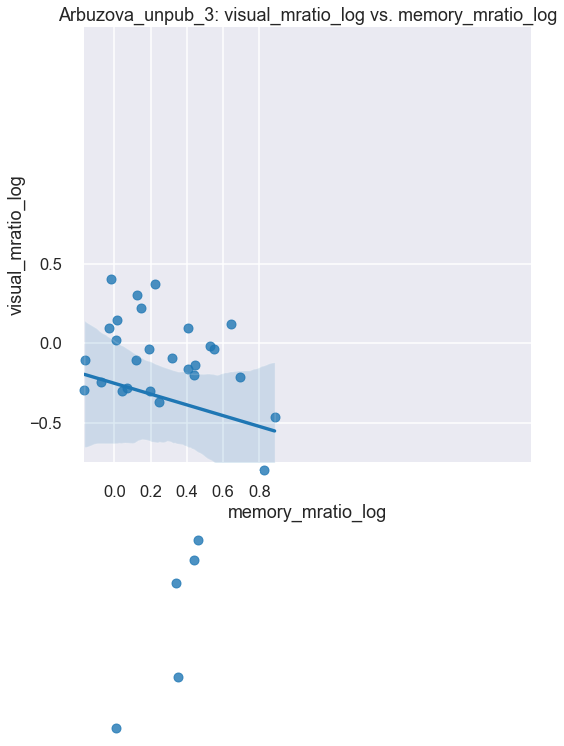

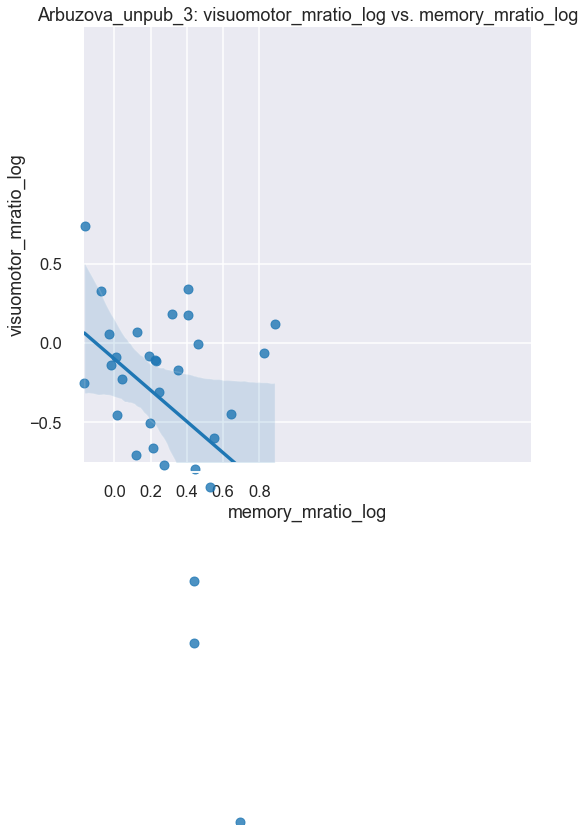

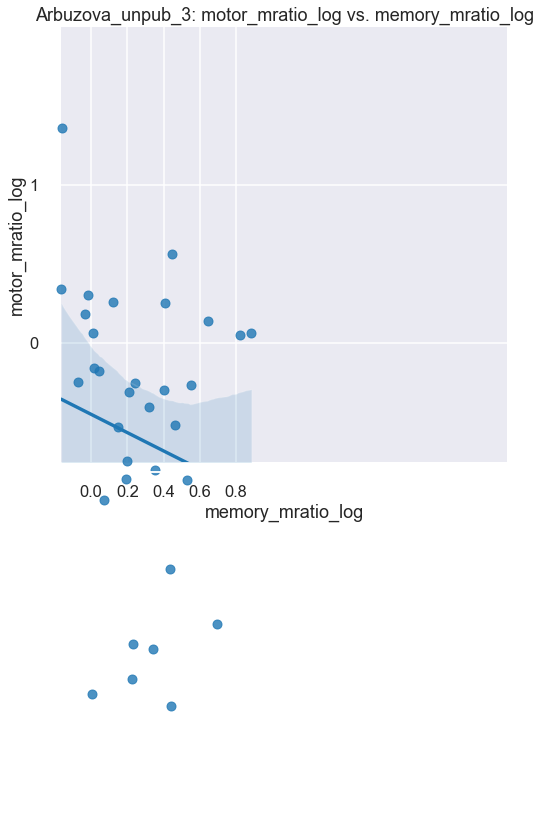

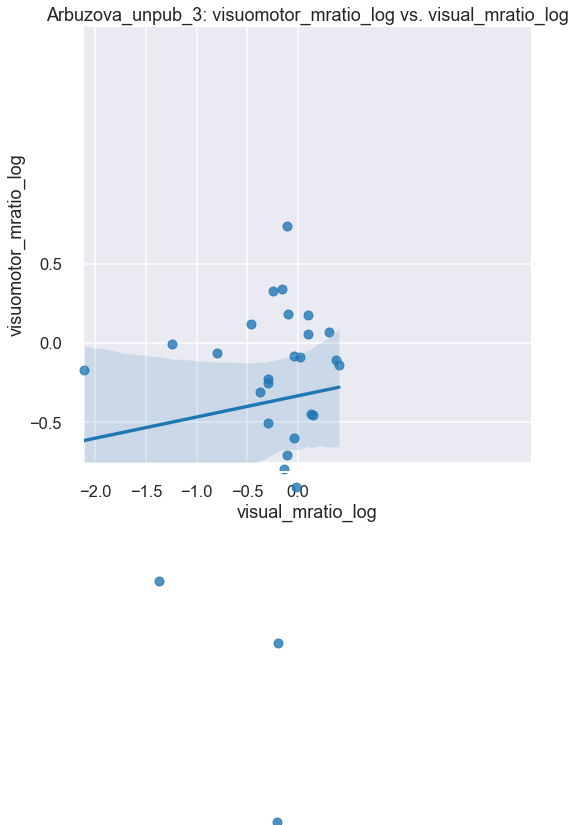

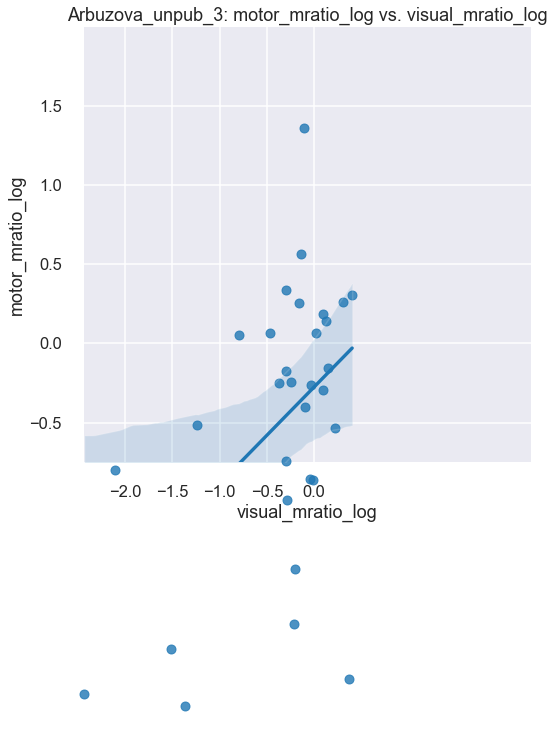

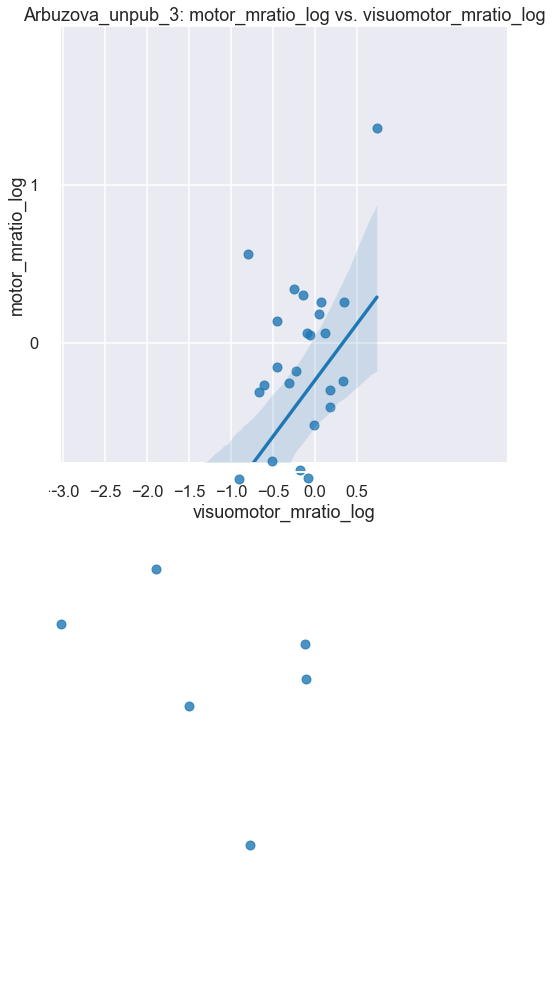

In [14]:
getComparisons(dataName='metrics_Arbuzova_unpub_3.csv', domains=['memory', 'visual', 'motor', 'visuomotor'])

VP_mratio_log & EF_mratio_log (r, p): (0.20515390465938727, 0.011787605068942674)
VP_mratio_log & SM_mratio_log (r, p): (0.06470862096113834, 0.43936741739381274)
VP_mratio_log & EM_mratio_log (r, p): (0.046539472130546655, 0.5756516566832159)
EF_mratio_log & SM_mratio_log (r, p): (0.005091301595399384, 0.9468402414781412)
EF_mratio_log & EM_mratio_log (r, p): (-0.012004324048002238, 0.8743573064789659)
SM_mratio_log & EM_mratio_log (r, p): (0.12432368053662984, 0.10520851763552211)


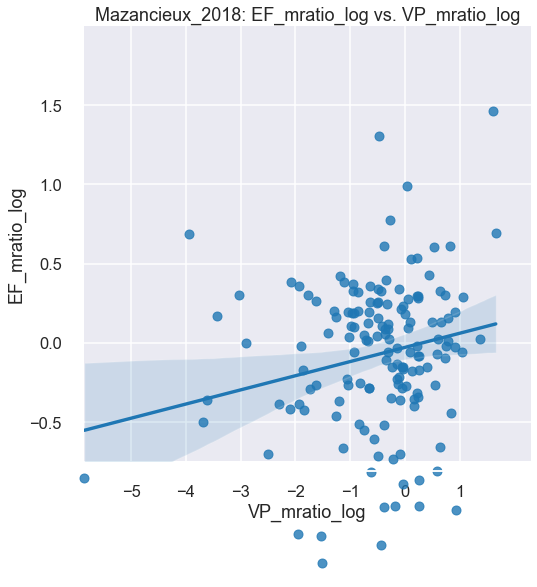

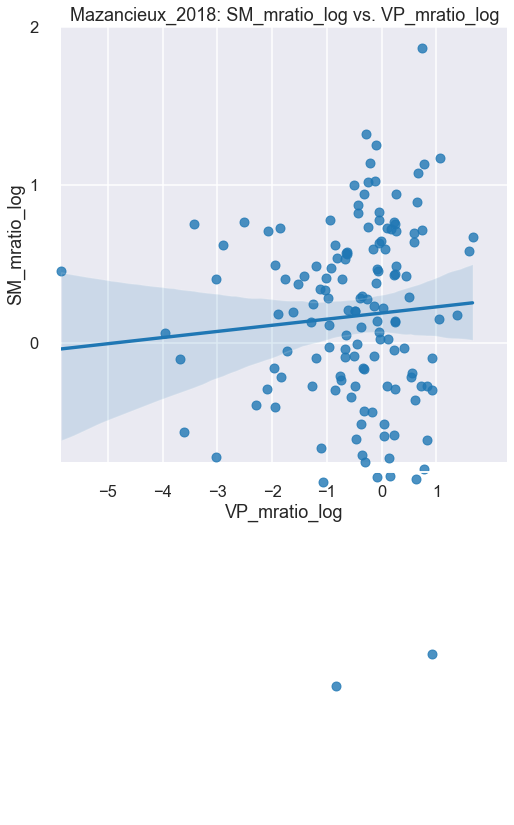

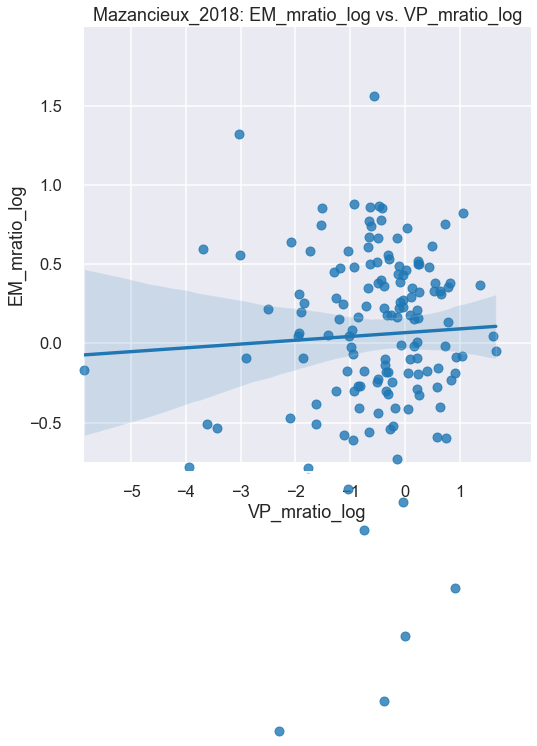

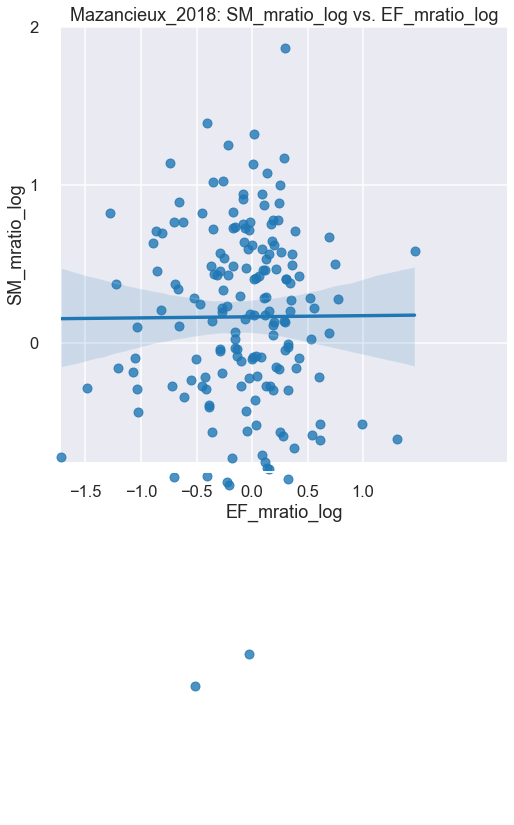

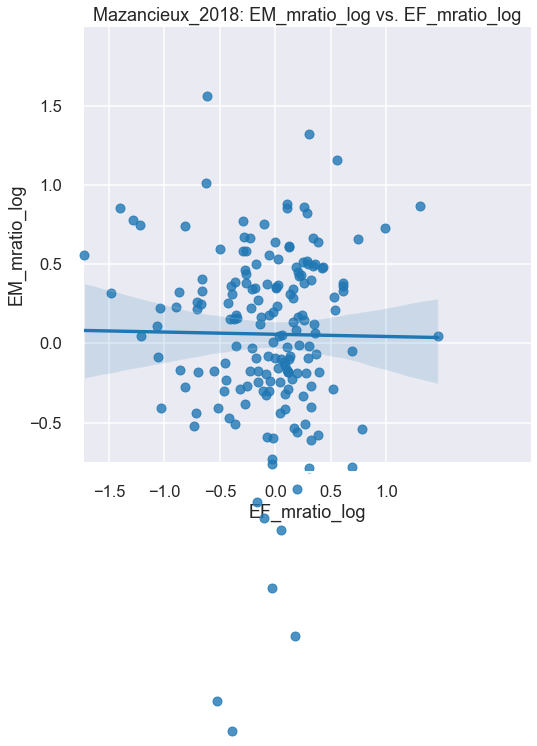

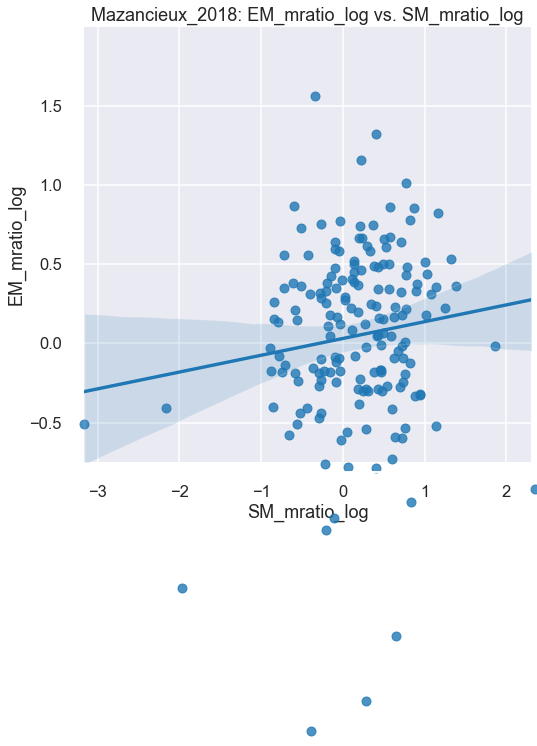

In [15]:
getComparisons(dataName='metrics_Mazancieux_2018.csv', domains=['VP', 'EF', 'SM', 'EM'])

percept_low_mratio_log & percept_high_mratio_log (r, p): (0.5427707949257601, 0.04490477749086289)
percept_low_mratio_log & wm_low_mratio_log (r, p): (0.33125531591334223, 0.24730387725039057)
percept_low_mratio_log & wm_high_mratio_log (r, p): (-0.24248011040769293, 0.4996771425657774)
percept_high_mratio_log & wm_low_mratio_log (r, p): (-0.0787452200588424, 0.7890209091100728)
percept_high_mratio_log & wm_high_mratio_log (r, p): (-0.4056532723628452, 0.24480156604572462)
wm_low_mratio_log & wm_high_mratio_log (r, p): (0.4761598875647277, 0.16416811022541514)


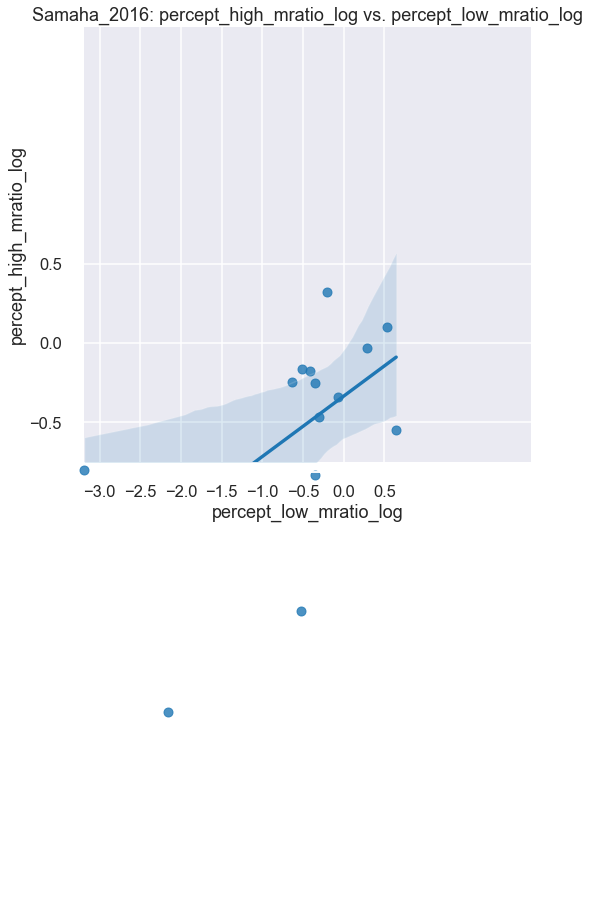

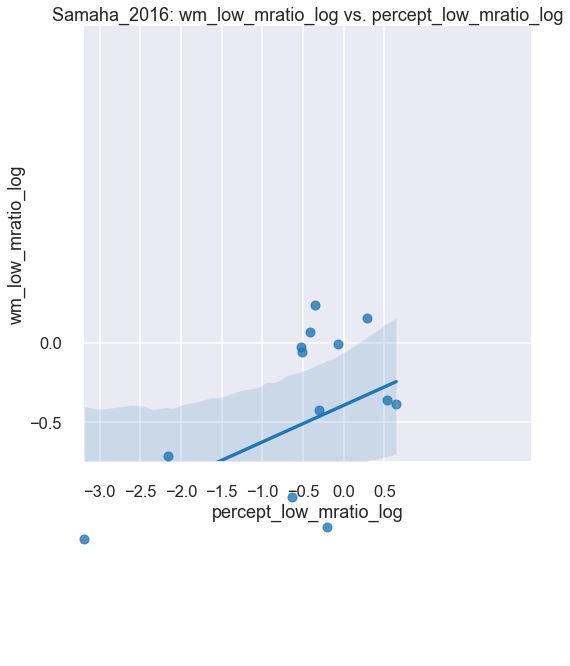

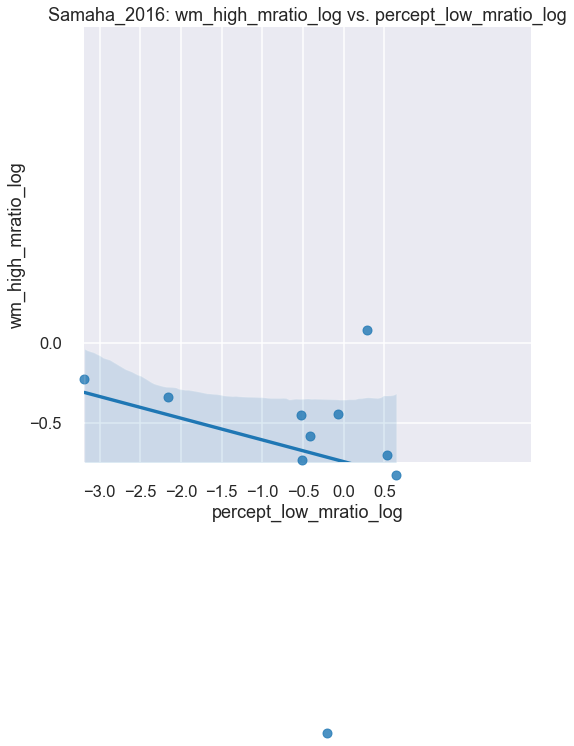

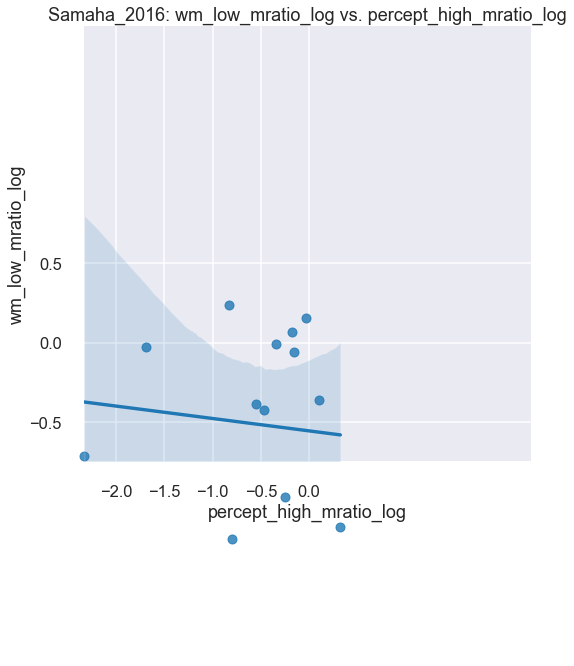

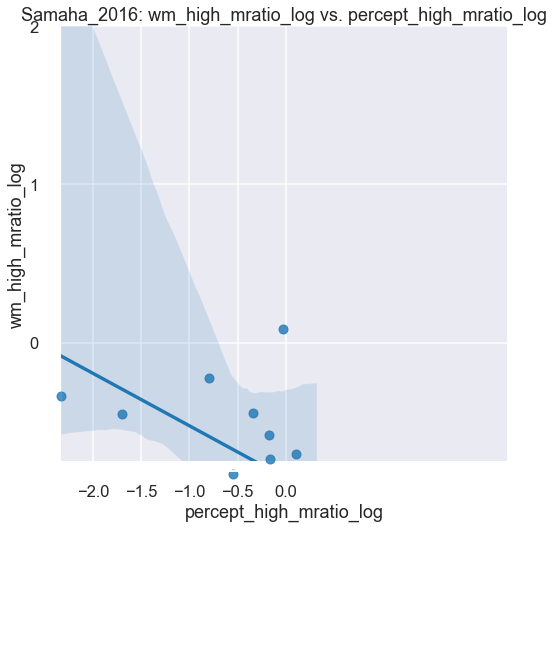

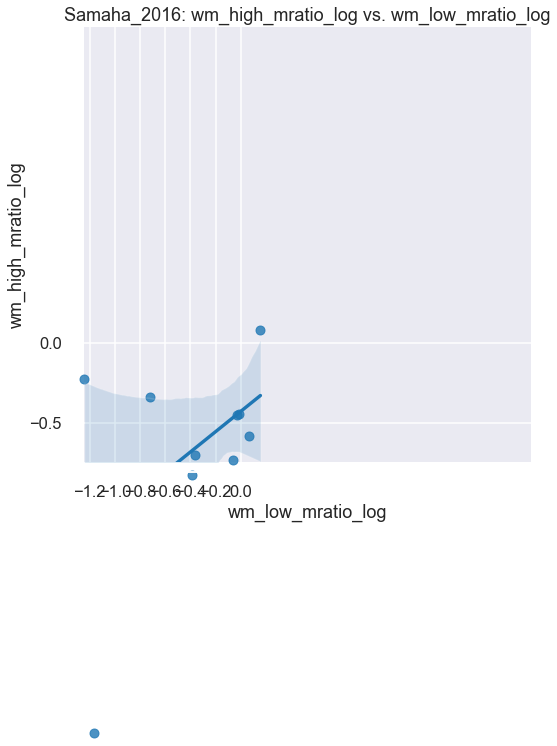

In [16]:
getComparisons(dataName='metrics_Samaha_2016.csv', domains=['percept_low', 'percept_high', 'wm_low', 'wm_high'])

memory_mratio_log & perception_mratio_log (r, p): (0.18685749723105047, 0.41734495760565293)


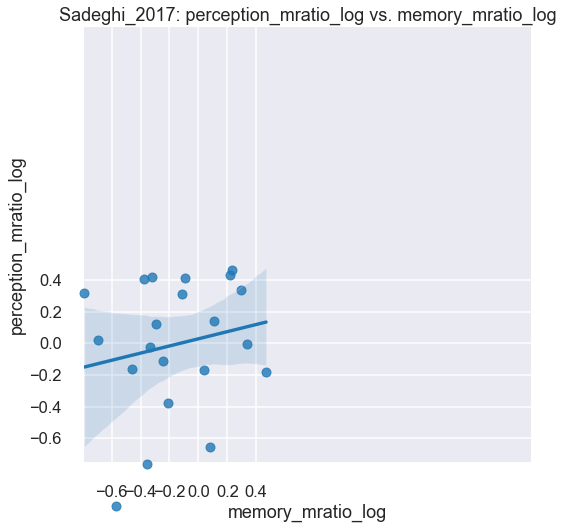

In [17]:
getComparisons(dataName='metrics_Sadeghi_2017.csv', domains=['memory', 'perception'])

memory_mratio_log & perception_mratio_log (r, p): (0.27928545025082974, 0.544143034918691)


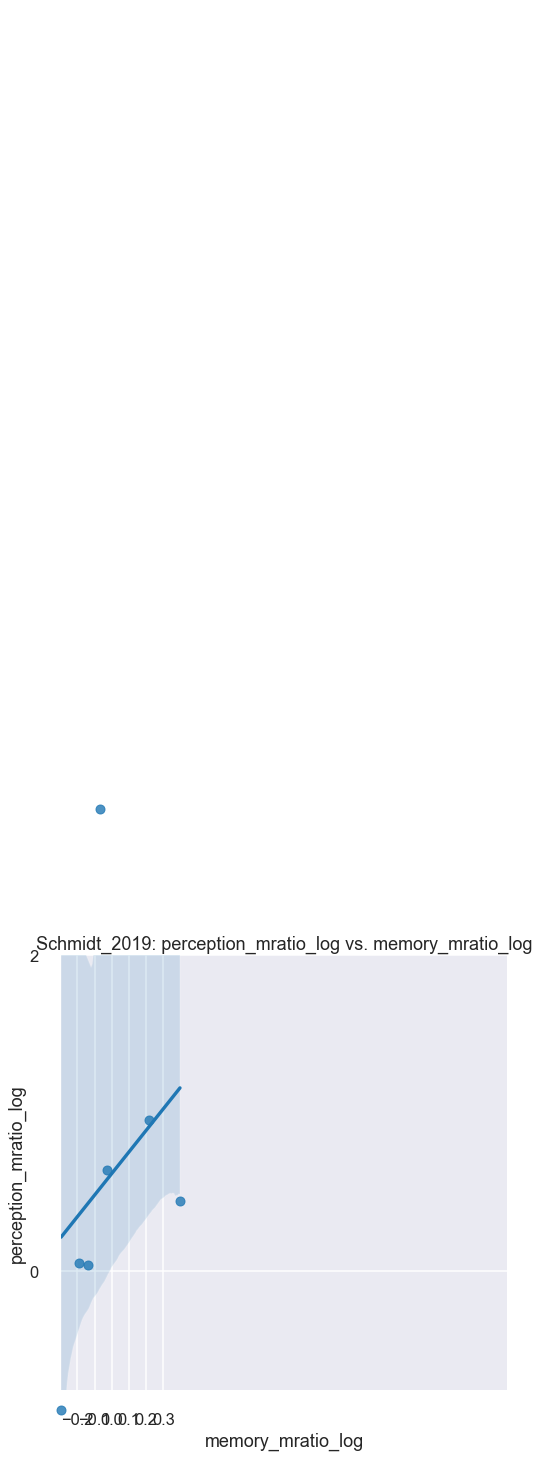

In [18]:
getComparisons(dataName='metrics_Schmidt_2019.csv', domains=['memory', 'perception'])

perception_mratio_log & memory_mratio_log (r, p): (0.2902076597977192, 0.24272213318488622)


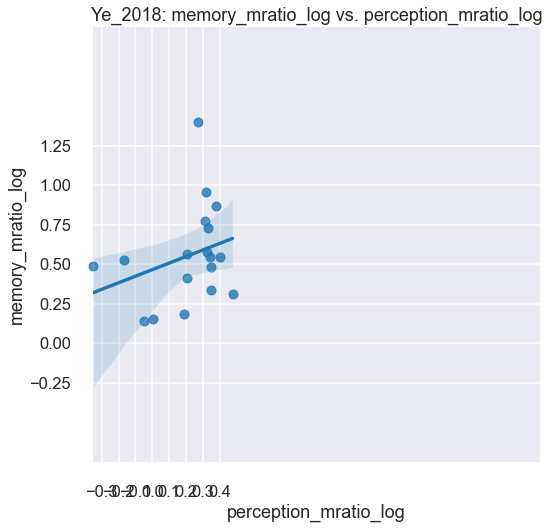

In [19]:
getComparisons(dataName='metrics_Ye_2018.csv', domains=['memory', 'perception'])

oriperc_mratio_log & contrast_mratio_log (r, p): (0.5991359665361932, 0.014182097364565011)
oriperc_mratio_log & oriwm_mratio_log (r, p): (0.5055775876178333, 0.03841873151470278)
contrast_mratio_log & oriwm_mratio_log (r, p): (0.1835612306987474, 0.4961861115059236)


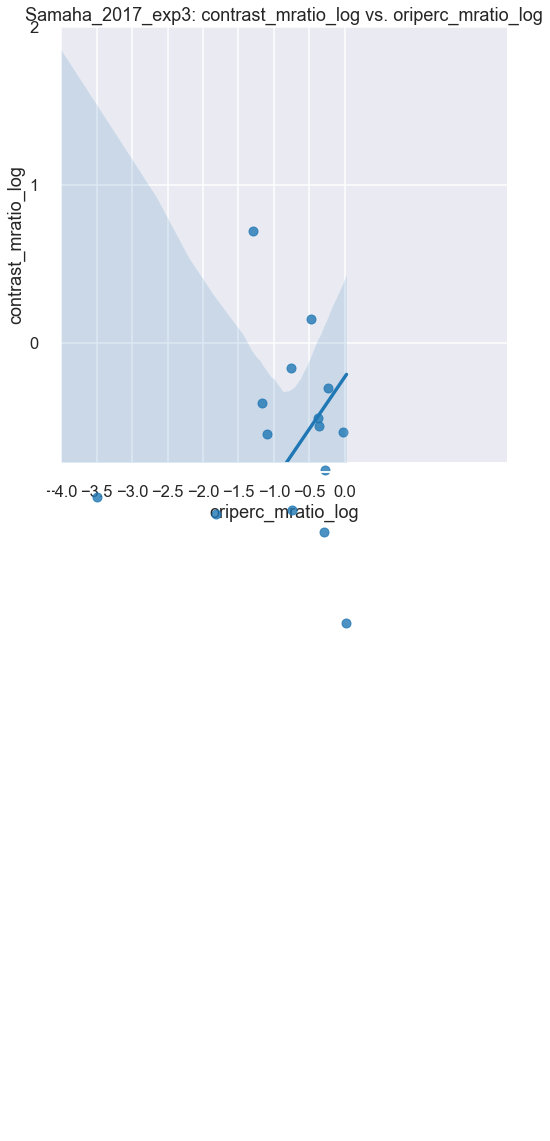

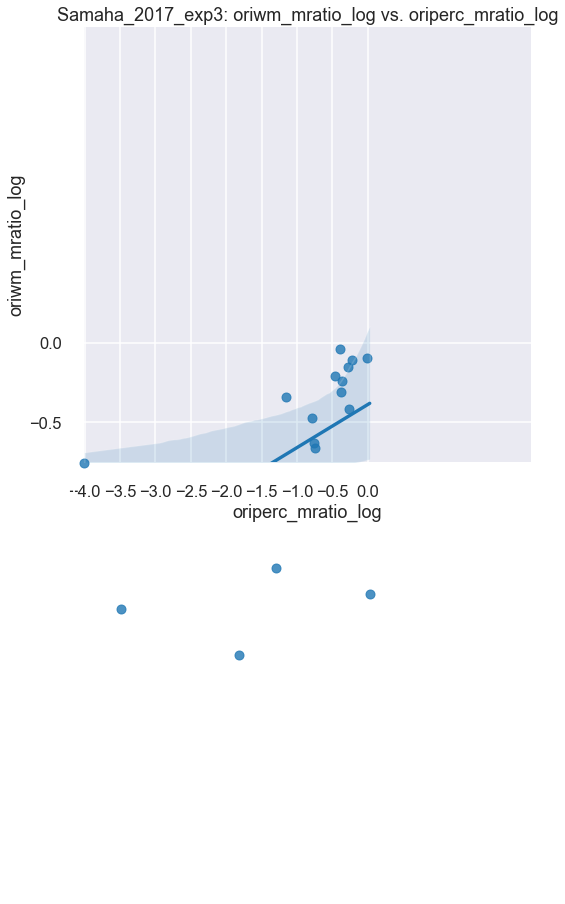

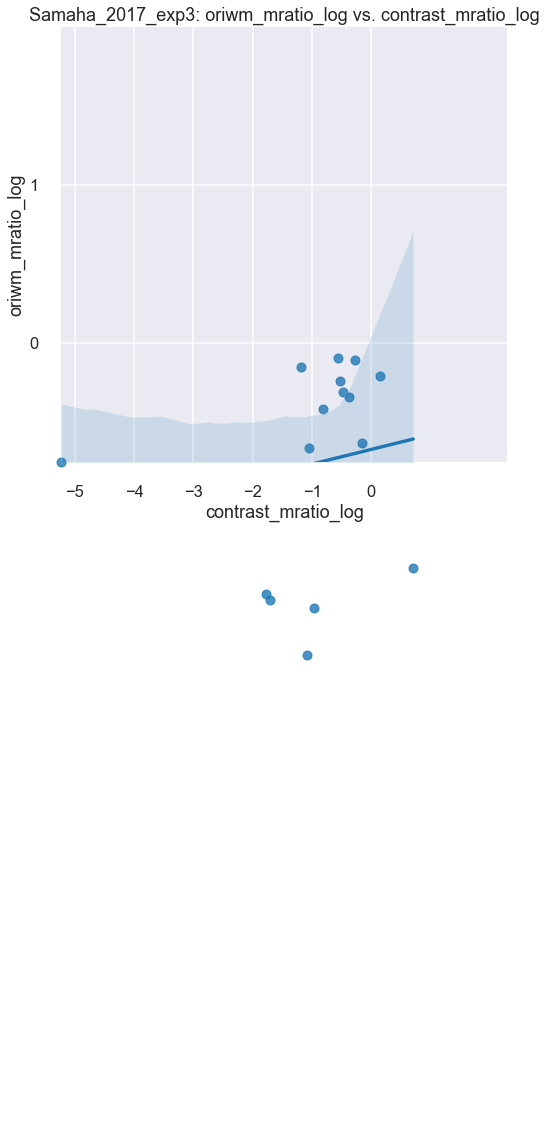

In [20]:
getComparisons(dataName='metrics_Samaha_2017_exp3.csv', domains=['oriperc', 'contrast', 'oriwm'])

FM_mratio_log & IM_mratio_log (r, p): (0.06279859457950972, 0.8107655772209886)
FM_mratio_log & WM_mratio_log (r, p): (-0.021984785077713592, 0.9355893197841424)
IM_mratio_log & WM_mratio_log (r, p): (0.08333903865082004, 0.7589582972219946)


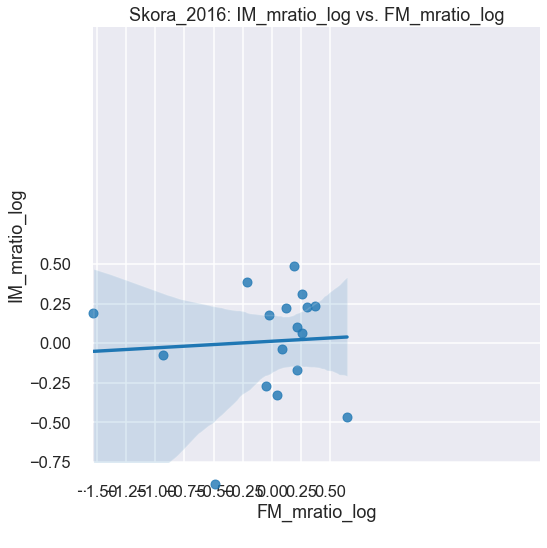

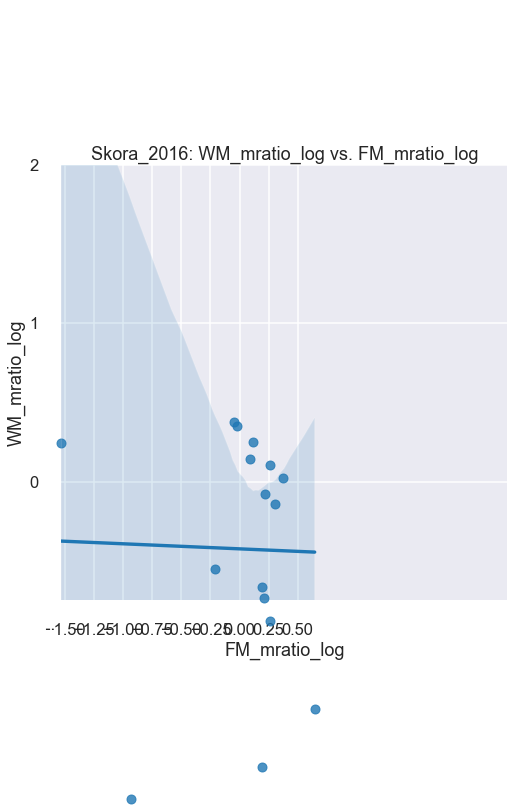

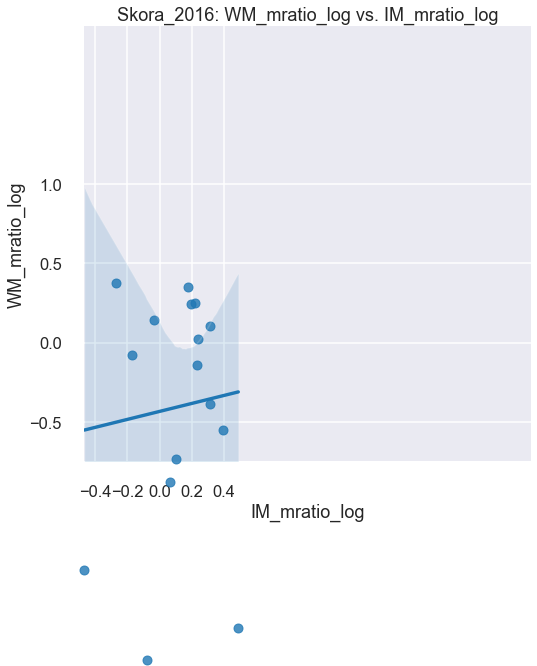

In [21]:
getComparisons(dataName='metrics_Skora_2016.csv', domains=['FM', 'IM', 'WM'])

N_low_mratio_log & N_high_mratio_log (r, p): (0.330239023490573, 0.3854226099042501)
N_low_mratio_log & C_low_mratio_log (r, p): (-0.36571315473795796, 0.4198177170456072)
N_low_mratio_log & C_high_mratio_log (r, p): (-0.27316137029468557, 0.4769711908341007)
N_high_mratio_log & C_low_mratio_log (r, p): (-0.33741140783285034, 0.18535093144312562)
N_high_mratio_log & C_high_mratio_log (r, p): (-0.1212087602758365, 0.6210960045275661)
C_low_mratio_log & C_high_mratio_log (r, p): (-0.2510492057876682, 0.33107777823748197)


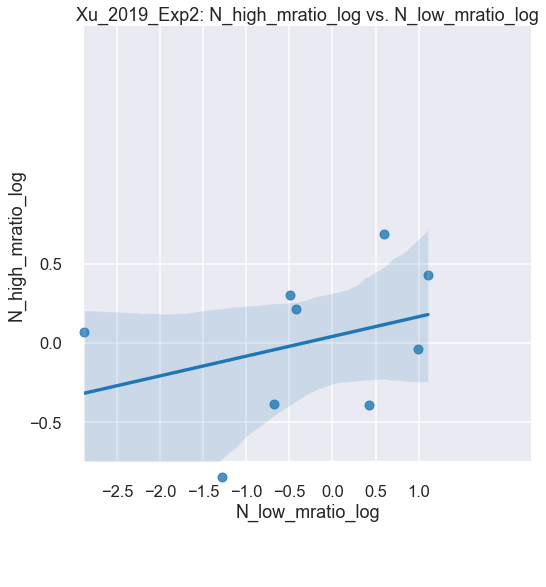

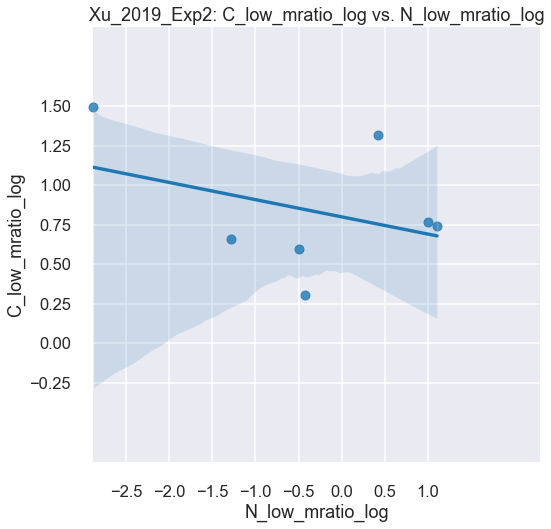

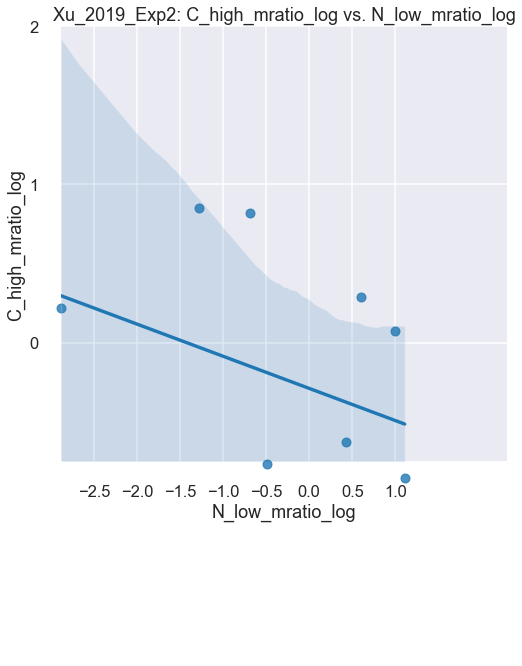

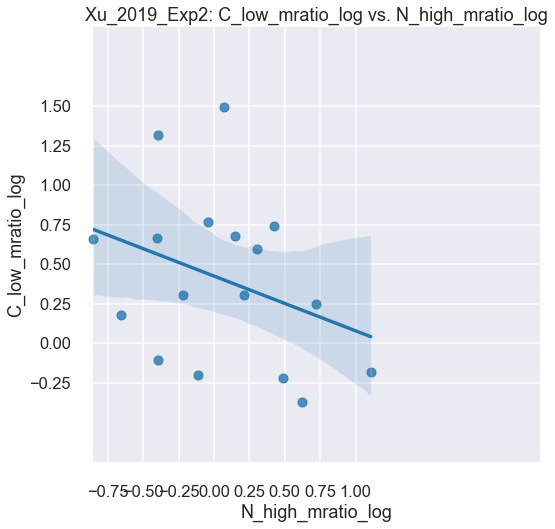

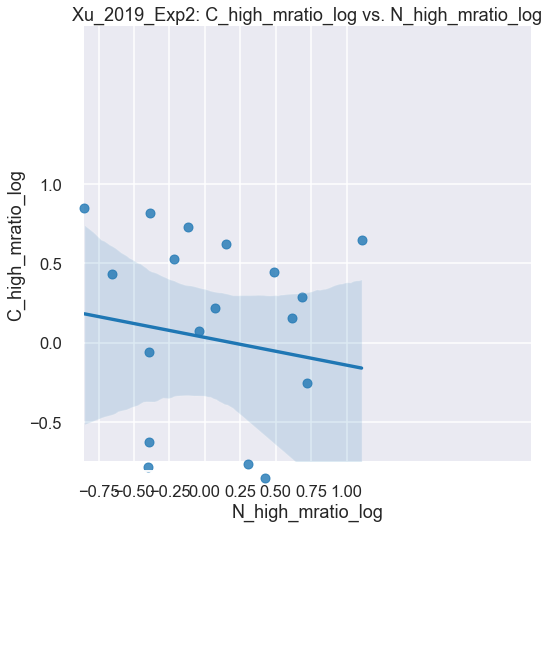

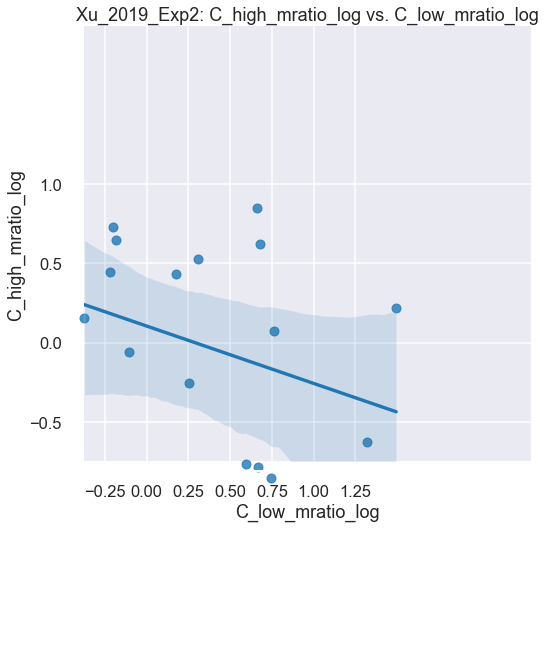

In [22]:
getComparisons(dataName='metrics_Xu_2019_Exp2.csv', domains=['N_low', 'N_high', 'C_low', 'C_high'])

## Create DGI Plots

DGI = domain-generality index – [more information](https://www.jneurosci.org/content/38/14/3534#sec-15)

$DGI = |logM_p - logM_m|$


In [23]:
def createDGIPlot(dataName):
    """
    For string {dataName}: creates side-by-side DGI plots for all combinations of domains
    ** not the cleanest looking, but got the job done for exploration **
    """
    df = pd.read_csv("../exports/" + dataName + ".csv")
    dropColumns = [column for column in list(df.columns) if "DGI" not in column]
    df.drop(dropColumns, axis=1, inplace=True)
    df.columns = df.columns.str.lstrip("DGI_")
    sns.boxplot(x="variable", y="value", data=pd.melt(df))
    sns.stripplot(data=pd.melt(df), x="variable", y="value", color="k")
    plt.tight_layout()
    sns.despine()

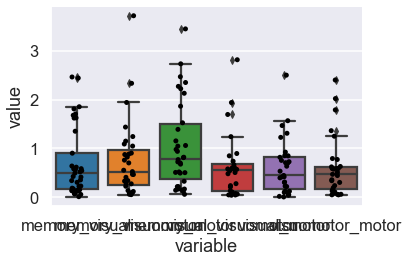

In [24]:
createDGIPlot(dataName='metrics_Arbuzova_unpub_3')

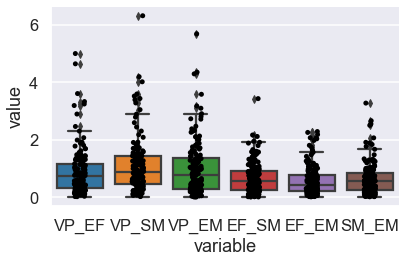

In [25]:
createDGIPlot(dataName='metrics_Mazancieux_2018')

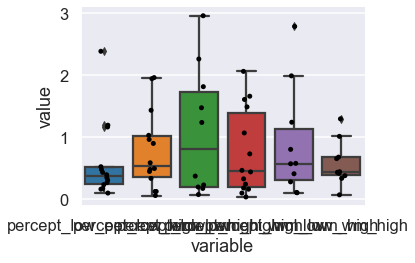

In [26]:
createDGIPlot(dataName='metrics_Samaha_2016')

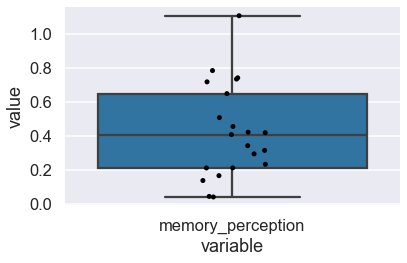

In [27]:
createDGIPlot(dataName='metrics_Sadeghi_2017')

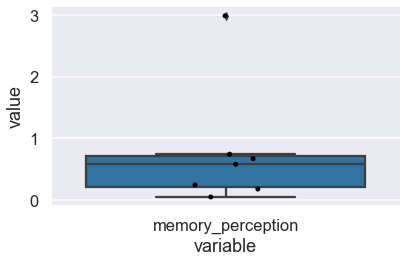

In [28]:
createDGIPlot(dataName='metrics_Schmidt_2019')

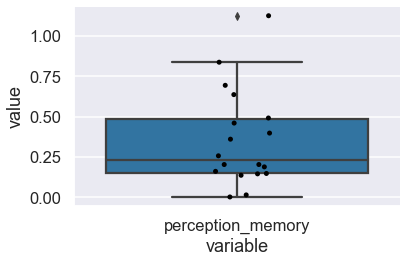

In [29]:
createDGIPlot(dataName='metrics_Ye_2018')

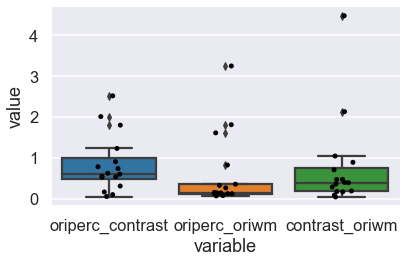

In [30]:
createDGIPlot(dataName='metrics_Samaha_2017_exp3')

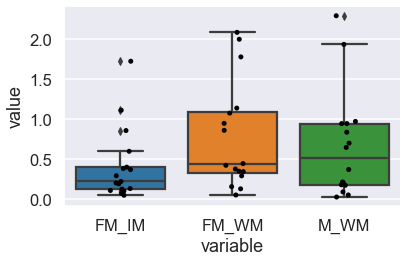

In [31]:
createDGIPlot(dataName='metrics_Skora_2016')

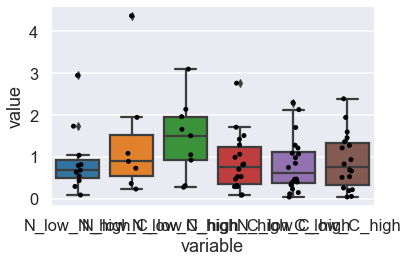

In [32]:
createDGIPlot(dataName='metrics_Xu_2019_Exp2')